In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import SVM

In [2]:
n = 20
x = np.linspace(-5, 5, n+1)
y = np.linspace(-5, 5, n+1)
xx, yy = np.meshgrid(x, y)

X = np.concatenate((xx.reshape(xx.shape[0]*xx.shape[1], 1),\
                     yy.reshape(yy.shape[0]*yy.shape[1], 1)), axis=1)

Y = np.ones(shape=xx.shape)
Y[(xx)**2 + 2 * (yy)**2 > 8] = -1
Y = Y.flatten()

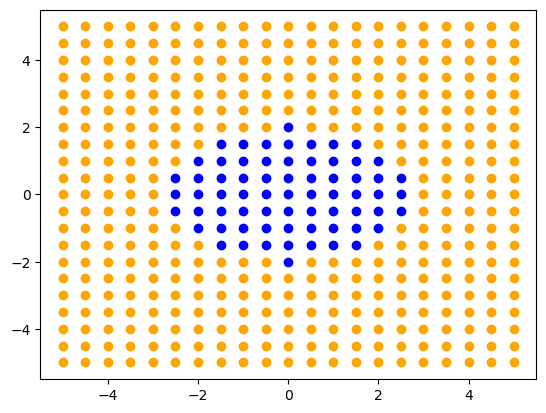

In [3]:
idx1 = Y==1
s = None
plt.scatter(X[idx1, 0], X[idx1, 1], s = s, color = 'blue')
plt.scatter(X[~idx1, 0], X[~idx1, 1], s = s, color = 'orange')

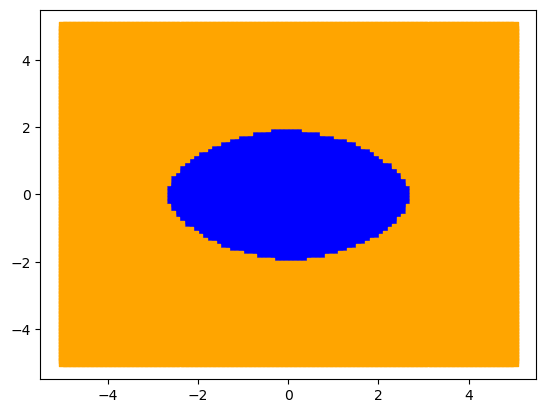

In [10]:
importlib.reload(SVM)

svm = SVM.SVM()
svm.fit(X, Y)

n2 = 100
x2 = np.linspace(-5, 5, n2+1)
y2 = np.linspace(-5, 5, n2+1)
xx2, yy2 = np.meshgrid(x2, y2)

X2 = np.concatenate((xx2.reshape(xx2.shape[0]*xx2.shape[1], 1),\
                     yy2.reshape(yy2.shape[0]*yy2.shape[1], 1)), axis=1)
y_pred = svm.pred(X2)

idx2 = y_pred==1
plt.scatter(X2[idx2, 0], X2[idx2, 1], s = s, color = 'blue', marker=',')
plt.scatter(X2[~idx2, 0], X2[~idx2, 1], s = s, color = 'orange', marker=',')

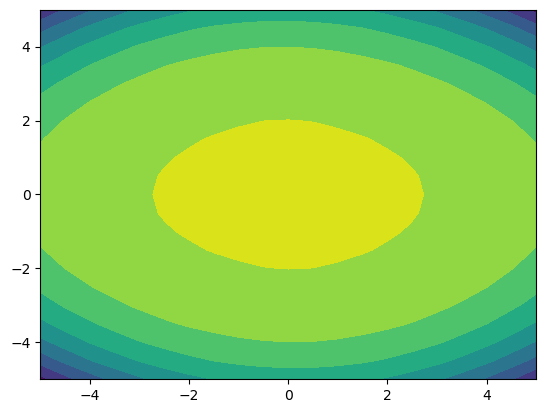

In [11]:
y_raw = svm.pred_raw(X)
h = plt.contourf(x, y, y_raw.reshape((n+1, n+1)))